In [50]:
import warnings
warnings.filterwarnings('ignore')

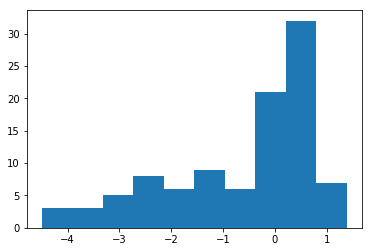

In [101]:
# Projet 1 
# Estimation de densité
# Exercice 1. 
import numpy as np
import matplotlib.pyplot as plt
# a
x_norm = np.random.normal(-1.5, np.sqrt(2), 50)
# b
x_unif = np.random.uniform(0, 1, 50)
#c
X = np.concatenate([x_norm, x_unif])
#X = np.random.normal(0,1,50)


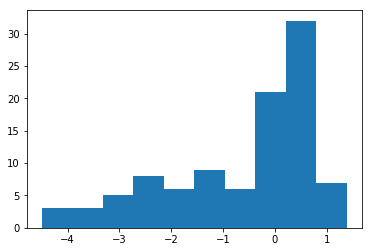

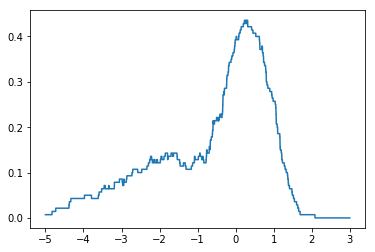

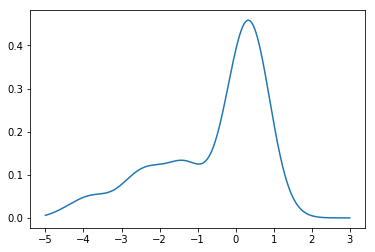

In [115]:
# Exercice 2
# a. Histogramme de X
plt.hist(X, bins=10)
plt.show()

# b. Les estimateurs à noyaux
X = X.reshape((len(X), 1))
grid_x = np.linspace(-5, 3, num = 10**4)
grid_x = grid_x.reshape((1, len(grid_x)))
n = len(X)
# noyau rectangulaire
h = 0.7
def f_rect(x):
    K_rect = 0.5*(np.abs((X - x)/h) < 1)
    return 1/(n*h)*np.sum(K_rect, axis = 0)
#f_rect = np.vectorize(f_rect)
f_rect_res = f_rect(grid_x)
f_rect_res = f_rect_res.reshape((grid_x.shape[1],1))
plt.plot(np.transpose(grid_x), f_rect_res)
plt.show()
# noyau gaussien
h = 0.4
def f_gauss(x):
    K_gauss = (1/np.sqrt(2*np.pi))*(np.exp(-((X - grid_x)/h)**2/2))
    return 1/(n*h)*np.sum(K_gauss, axis = 0)
f_gauss_res = f_gauss(grid_x)
f_gauss_res = f_gauss_res.reshape((grid_x.shape[1],1))
plt.plot(np.transpose(grid_x), f_gauss_res)
plt.show()

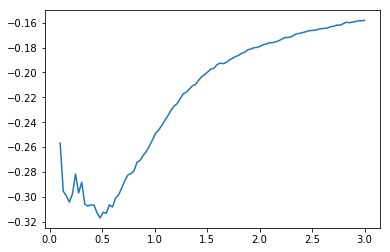

H optimal est 0.480808080808


In [112]:
# c. Choix de h optimal avec validation croisée
# Noyau rectangulaire
h_grid = np.linspace(0.1,3,num=10**2)
h_grid = h_grid.reshape((len(h_grid),1))
# integral de f^2
def f_rect2(x):
    K_rect = 0.5*(np.abs((X - x)/h) < 1)
    return (1/(n*h)*np.sum(K_rect, axis = 0))**2
from scipy import integrate
int_f2 = np.zeros((len(h_grid),1))
for i in np.arange(h_grid.shape[0]):
    h = h_grid[i,0]
    int_f2[i,0]=integrate.quad(f_rect2, -np.inf, np.inf)[0]

inds = np.arange(X.shape[0])
f_rect_no_i = np.zeros((len(X),1))
def G(h):
    for i in inds:
        X_no_i = X[np.arange(len(X))!=i]
        K_rect_no_i = 0.5*(np.abs((X_no_i - X[i, 0])/h) < 1)
        f_rect_no_i[i, 0] = 1/((n-1)*h)*np.sum(K_rect_no_i, axis = 0)
    return(np.mean(f_rect_no_i))
G = np.vectorize(G)
J_h = int_f2 - 2*G(h_grid)

plt.plot(h_grid,J_h)
plt.show()

h_opt = h_grid[np.argmin(J_h),0]
print("H optimal est " + str(h_opt))

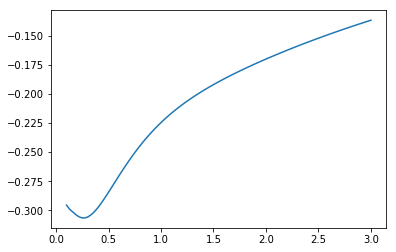

H optimal est 0.275757575758


In [113]:
# Noyau gaussien
h_grid = np.linspace(0.1,3,num=10**2)
h_grid = h_grid.reshape((len(h_grid),1))
# integral de f^2
def f_gauss2(x):
    K_gauss = (1/np.sqrt(2*np.pi))*(np.exp(-((X - x)/h)**2/2))
    return(1/(n*h)*np.sum(K_gauss, axis = 0))**2
from scipy import integrate
int_f2 = np.zeros((len(h_grid),1))
for i in np.arange(h_grid.shape[0]):
    h = h_grid[i,0]
    int_f2[i,0]=integrate.quad(f_gauss2, -np.inf, np.inf)[0]

inds = np.arange(X.shape[0])
f_gauss_no_i = np.zeros((len(X),1))
def G(h):
    for i in inds:
        X_no_i = X[np.arange(len(X))!=i]
        K_gauss_no_i = (1/np.sqrt(2*np.pi))*(np.exp(-((X_no_i - X[i, 0])/h)**2/2))
        f_gauss_no_i[i, 0] = 1/((n-1)*h)*np.sum(K_gauss_no_i, axis = 0)
    return(np.mean(f_gauss_no_i))
G = np.vectorize(G)
J_h = int_f2 - 2*G(h_grid)

plt.plot(h_grid,J_h)
plt.show()

h_opt = h_grid[np.argmin(J_h),0]
print("H optimal est "+str(h_opt))